In [1]:
# Import the improved query and utility functions
import matplotlib.pyplot as plt

from ethopy_analysis.db.queries import get_setup, get_sessions, session_summary
from ethopy_analysis.plots import (
    difficultyPlot,
    LickPlot,
    plot_licks_state,
    plot_first_lick_after,
    valid_ready_state,
    plot_valid_proximity_state,
    plot_proximities_dur,
    calculate_proximity_duration,
    plot_trial_time,
    liquidsPlot,
    plot_states_in_time,
    plot_licks_time
)

from ethopy_analysis.plots.utils import setup_plot_style
# Set up plotting style
setup_plot_style("seaborn", font_size=12)


/Users/alexandros/Documents/GitHub/ethopy_plots/.venv/lib/python3.11/site-packages/datajoint/plugin.py:4: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [2]:
# get the last animal id and session of the setup
animal_id, session = get_setup("ef-rp13")

session_summary(animal_id, session)


# # get all sessions(with min 2 trials) of animal_id x and select the last one
# animal_id = x

# sessions = get_sessions(animal_id, min_trials=2)
# session = sessions['session'].iloc[-1]

# session_summary(animal_id, session)

[2025-07-14 12:55:35,578][INFO]: DataJoint 0.14.4 connected to eflab@database.eflab.org:3306


Animal id: 290, session: 44
User name: bot
Setup: ef-rp13
Session start: 2025-07-14 10:30:02
Session duration: 37.18 minutes (2230.8 seconds)

Experiment:  MatchPort
Stimulus:  Panda
Behavior:  MultiPort

Task filename: 2object_detection_visual-dif0-1.py
Git hash: b06989f

Session performance: 0.9900990099009901
Number of trials: 462


difficulty 0: performance 0.99


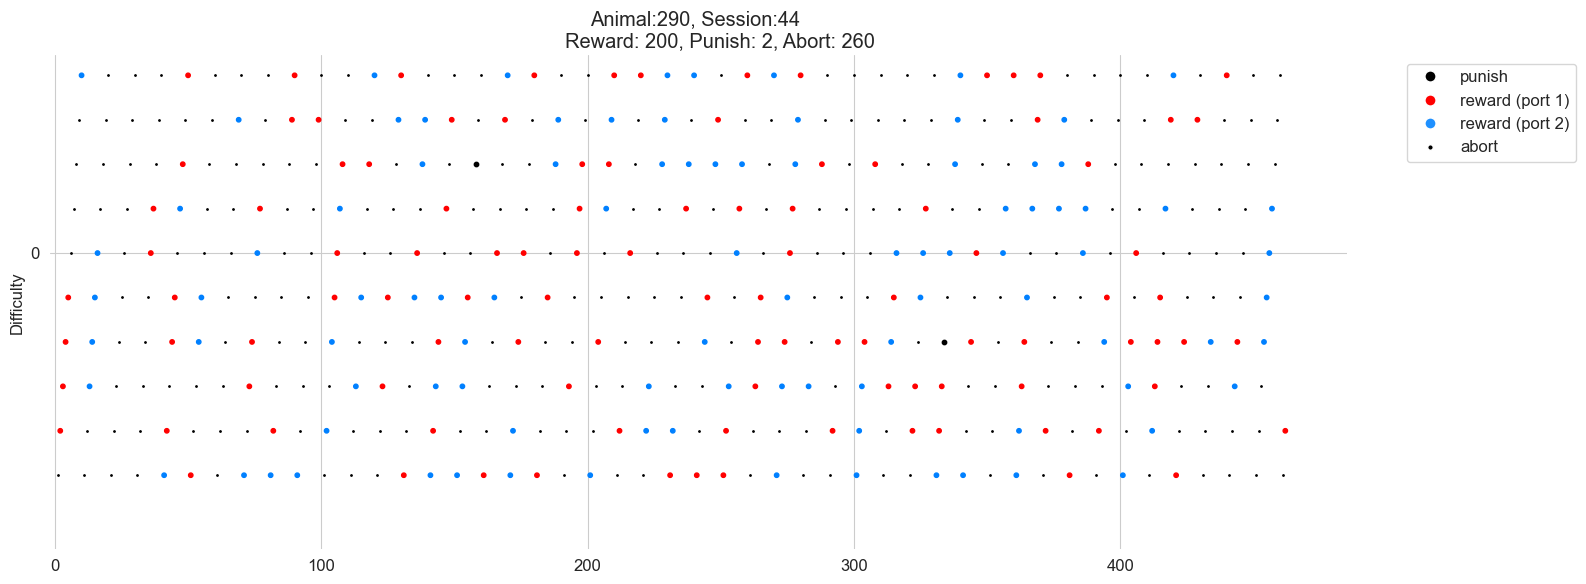

In [3]:
difficultyPlot(animal_id, session)

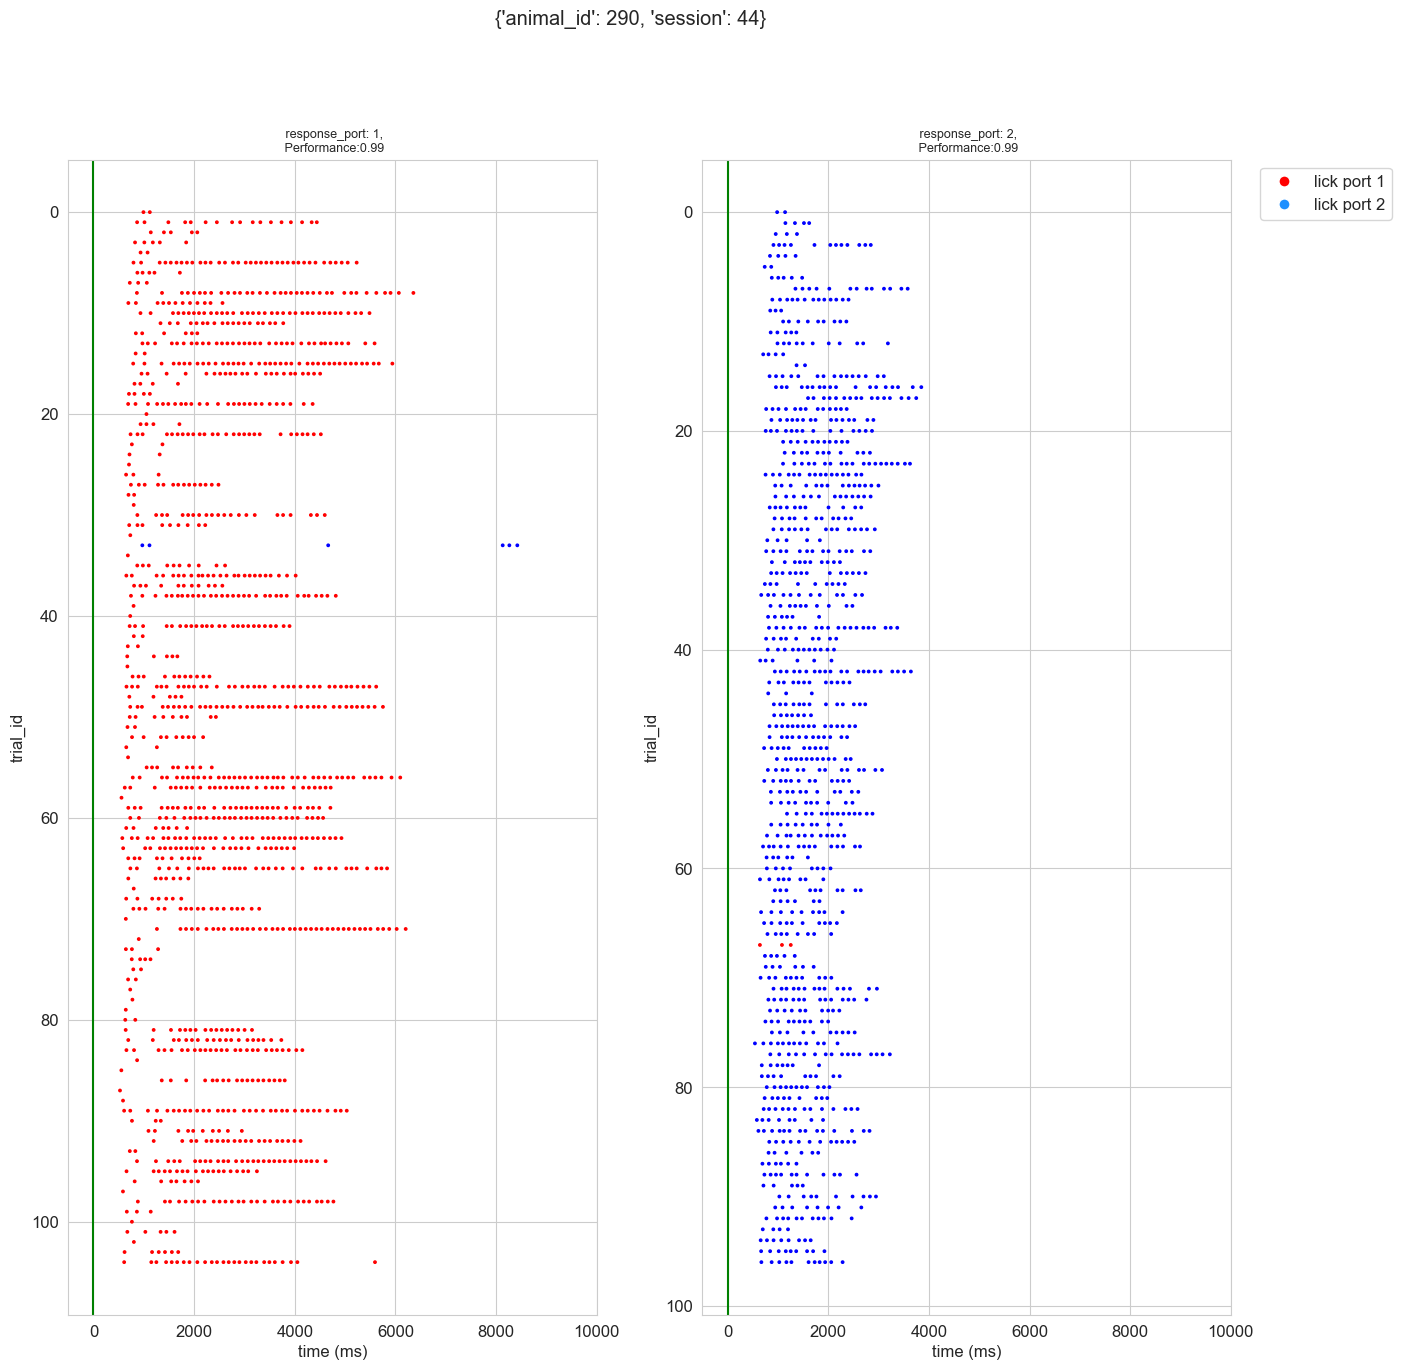

port: 1
    mean licks: 14.1125
    trials count: 80
port: 2
    mean licks: 9.135416666666666
    trials count: 96


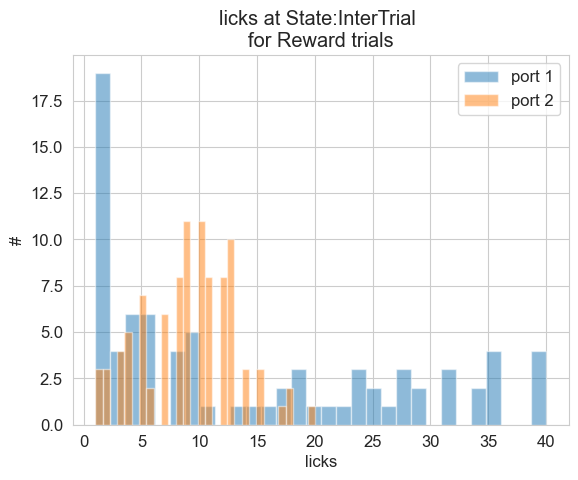

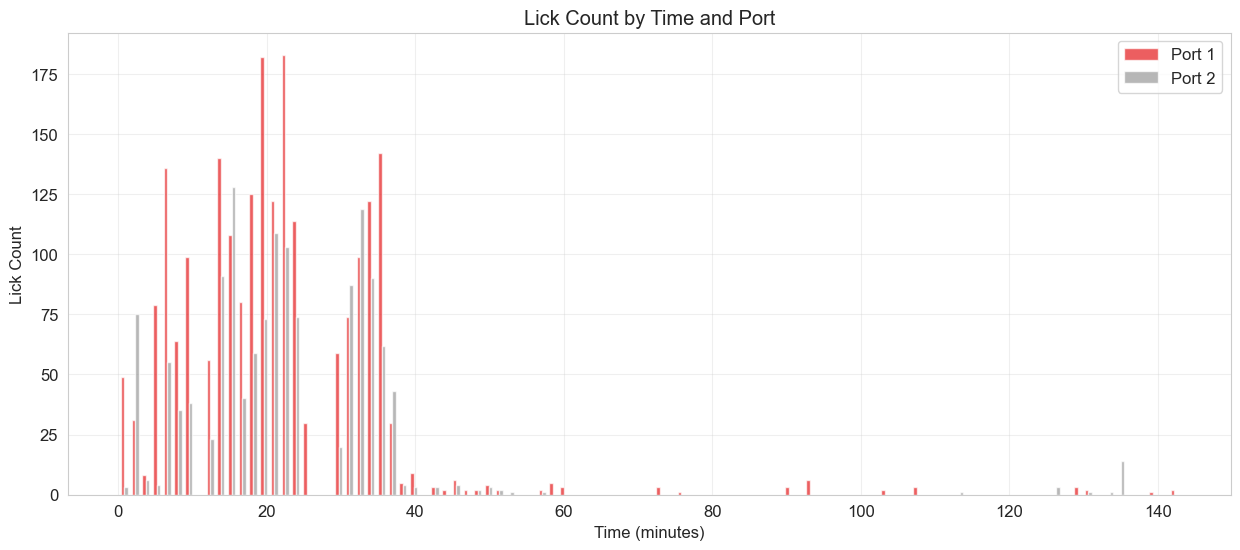

############### last date: 2025-07-14, amount: 1200.0 ###############


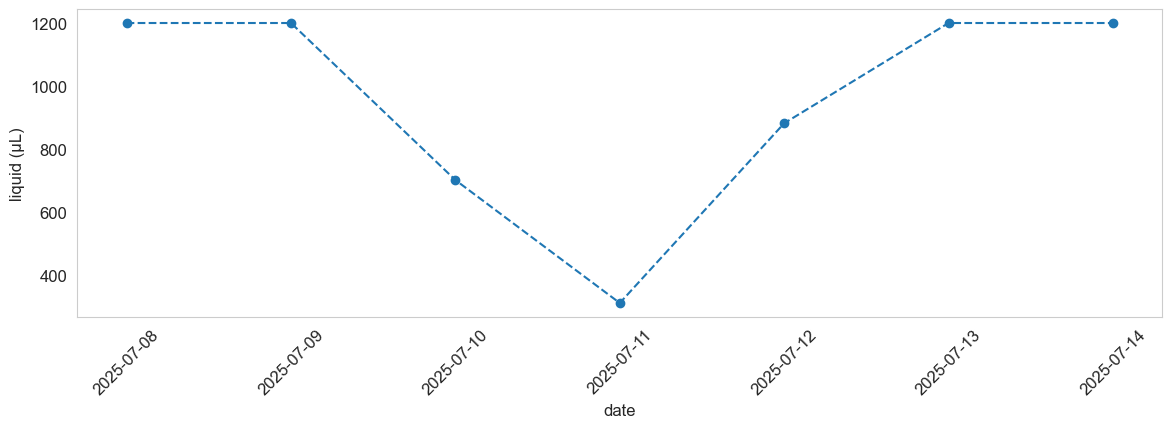

In [4]:
LickPlot(animal_id, session,state_start='Trial')

plot_licks_state(animal_id, session,bins=30)

plot_licks_time(animal_id , session, bins=100)

liquidsPlot(animal_id, days=15)

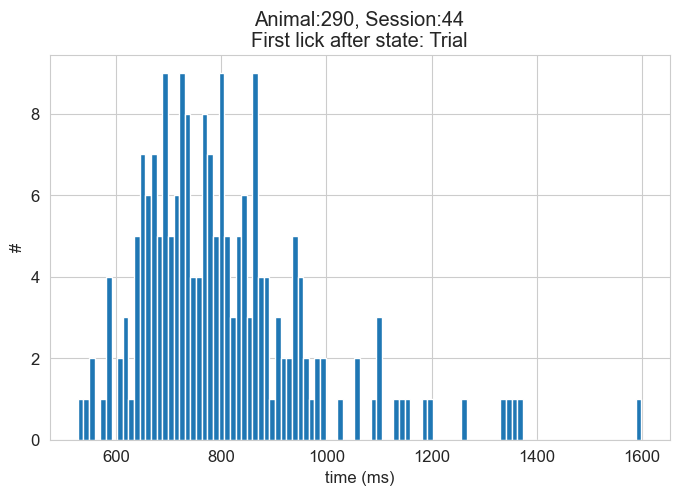

In [5]:
state_first_lick = plot_first_lick_after(animal_id, session, state='Trial', sub_state='Reward')

/Users/alexandros/Documents/GitHub/ethopy_plots/src/ethopy_analysis/plots/session.py:561: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ready_times_state = states_check.groupby("trial_idx").apply(
/Users/alexandros/Documents/GitHub/ethopy_plots/src/ethopy_analysis/plots/session.py:561: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ready_times_state = states_check.groupby("trial_idx").apply(


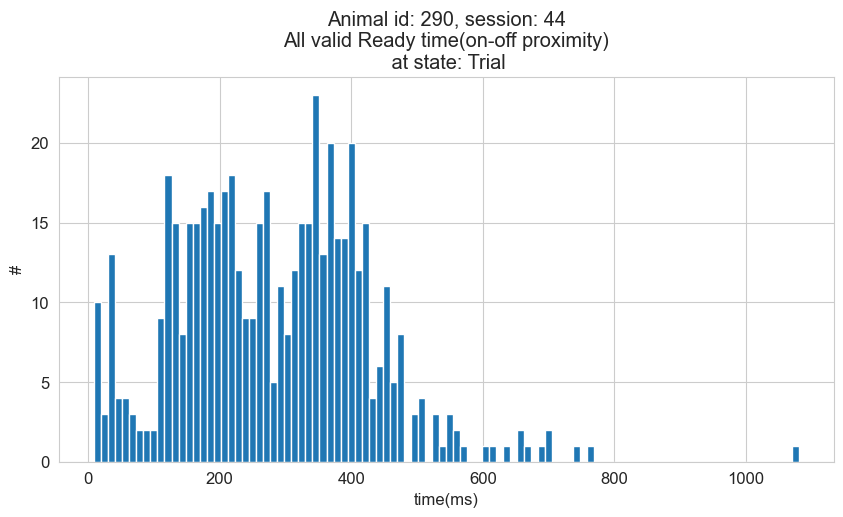

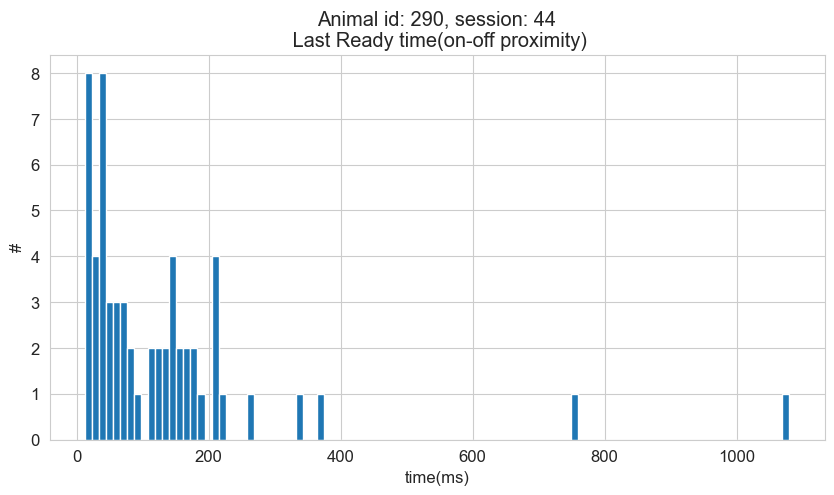

In [6]:
ready_times_state = valid_ready_state(animal_id, session, state = 'Trial')
plot_valid_proximity_state(animal_id, session, state="Trial")


# find the last on-off proximity per trial
last_on_off = [readys[-1] for readys in ready_times_state if len(readys)>1]

plt.figure(figsize=(10, 5))
plt.hist(last_on_off,bins=100);
plt.title(f"Animal id: {animal_id}, session: {session}\n Last Ready time(on-off proximity)")
plt.xlabel("time(ms)")
plt.ylabel("#")
plt.show()

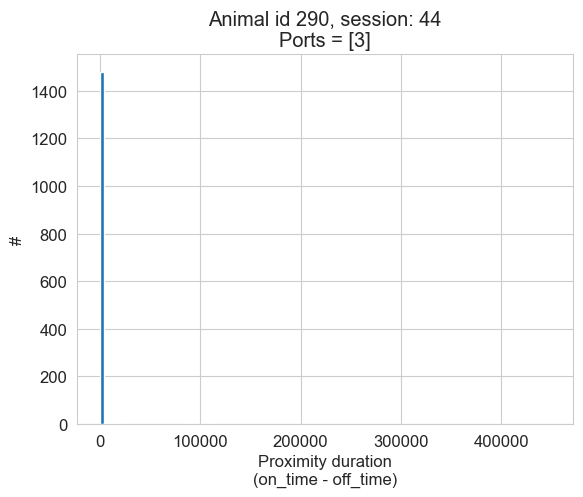

,animal_id,session,trial_idx,port,time_on,in_position,time_off,duration
2566,290,44,462,3,2313867,1,2335195,21328
2598,290,44,462,3,2443744,1,2460569,16825
2600,290,44,462,3,2460787,1,2579676,118889
2706,290,44,462,3,3103416,1,3190386,86970
2708,290,44,462,3,3412144,1,3442775,30631
2740,290,44,462,3,4412235,1,4520649,108414
2746,290,44,462,3,4531741,1,4537816,6075
2814,290,44,462,3,6461368,1,6486148,24780
2832,290,44,462,3,7859961,1,7948957,88996
2842,290,44,462,3,8106505,1,8330730,224225


In [15]:
plot_proximities_dur(animal_id, session, bins=100)

# check duration that might be too long
prox_duration = calculate_proximity_duration(animal_id, session)
prox_duration.loc[prox_duration['duration']>5000]

states of Trial
   animal_id  session  trial_idx    time       state  time_spend
0        290       44         10  132185    PreTrial      2351.0
1        290       44         10  134536       Trial      1032.0
2        290       44         10  135568      Reward        33.0
3        290       44         10  135601  InterTrial       604.0
4        290       44         11  136205    PreTrial     10072.0
5        290       44         11  146277       Trial       115.0
6        290       44         11  146392       Abort       501.0
7        290       44         11  146893  InterTrial        -0.0
Licks of Trial
    animal_id  session  trial_idx  port    time
0         290       44         10     2  135521
1         290       44         10     2  135679
2         290       44         11     1  147297
3         290       44         11     1  147397
4         290       44         11     2  136454
5         290       44         11     2  136572
6         290       44         11     2  136794


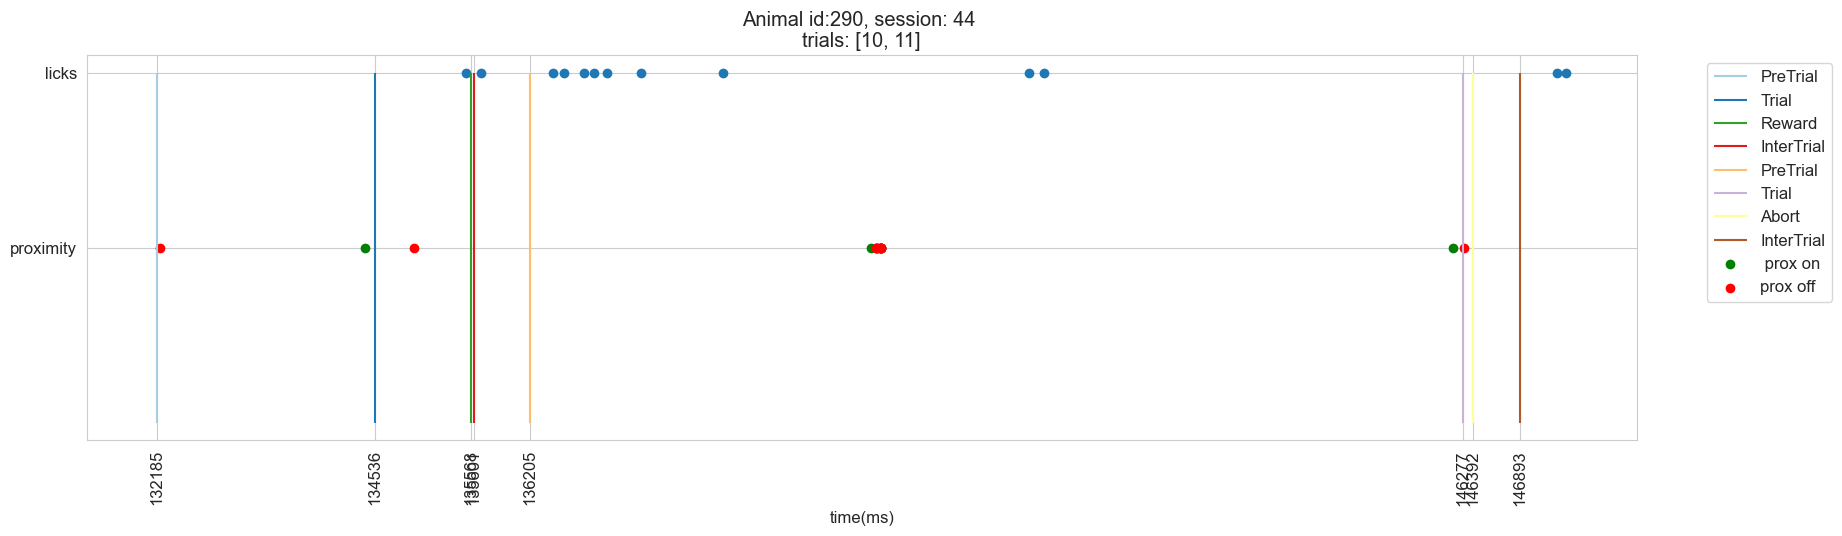

In [12]:
trial_states, trial_licks, trial_prox = plot_trial_time(animal_id, session, trials = [10,11])

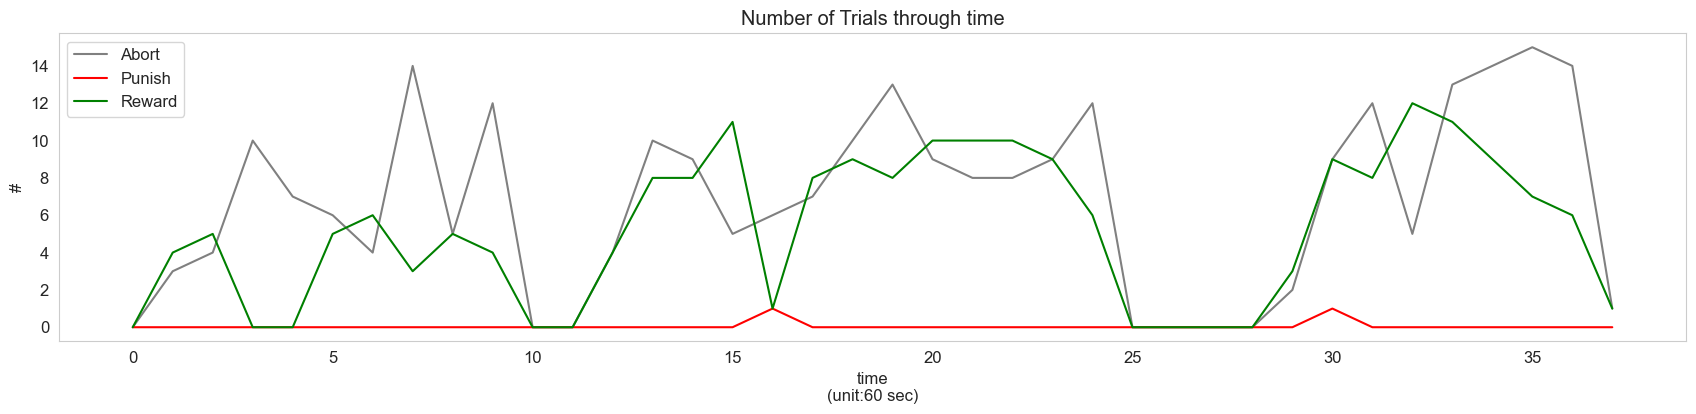

In [13]:
plot_states_in_time(animal_id, session, seconds=60)